In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.utils.constants import data_folder
from src.utils.misc import init_notebook

In [ ]:
init_notebook()

In [ ]:
original_dataset = pd.read_csv(f"{data_folder}/raw/handwritten_data_785.csv", header=None)

In [ ]:
original_dataset.head()

In [ ]:
letter_col = "0"  # Remplace par le vrai nom de la colonne des lettres
letter_counts = original_dataset[letter_col].value_counts().sort_index()

In [ ]:
letter_counts

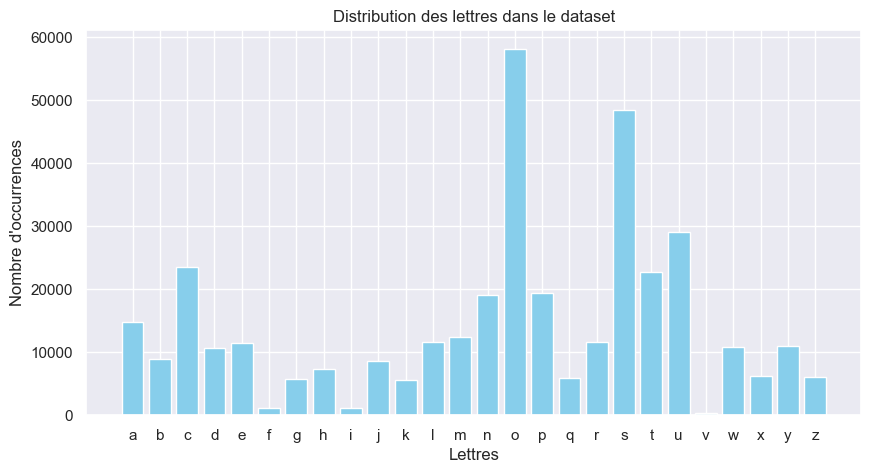

In [ ]:
from src.utils.constants import letters_list

plt.figure(figsize=(10, 5))
plt.bar(letter_counts.index, letter_counts.values, color="skyblue")
plt.xlabel("Lettres")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des lettres dans le dataset")
plt.xticks(
    ticks=range(26),
    labels=letters_list,
)
plt.show()

In [ ]:
original_dataset.dtypes

In [ ]:
original_dataset = original_dataset.astype(np.uint8)

In [ ]:
original_dataset.to_parquet(
    f"{data_folder}/data.parquet", index=False, engine="pyarrow", compression="zstd"
)  # 68 Mo

In [ ]:
def extract_sample(
    df: pd.DataFrame, letter_col: str, n: int = 3000, uniform: bool = False
) -> pd.DataFrame:
    if uniform:
        # 📌 Distribution uniforme (1/26 pour chaque lettre)
        sample_size = n // 26  # Nombre d'échantillons par lettre
        sampled_df = df.groupby(letter_col, group_keys=False).apply(
            lambda x: x.sample(min(sample_size, len(x)), random_state=42)
        )

    else:
        # 📌 Respect de la distribution originale
        sampled_df = df.sample(
            n=n, weights=df[letter_col].map(letter_counts), random_state=42
        )

    return sampled_df.reset_index(drop=True)

In [ ]:
# 📌 Extraction avec distribution originale
sample_original = extract_sample(original_dataset, letter_col, n=3000, uniform=False)

# 📌 Extraction avec distribution uniforme
sample_uniform = extract_sample(original_dataset, letter_col, n=3000, uniform=True)

# 📌 Vérification des nouvelles distributions
print(
    "Distribution originale (3000 échantillons) :\n",
    sample_original[letter_col].value_counts(),
)
print(
    "Distribution uniforme (3000 échantillons) :\n",
    sample_uniform[letter_col].value_counts(),
)

# 📌 Sauvegarde des échantillons si besoin
sample_original.to_parquet(
    f"{data_folder}/raw/sample_original.parquet",
    index=False,
    engine="pyarrow",
    compression="zstd",
)
sample_uniform.to_parquet(
    f"{data_folder}/raw/sample_uniform.parquet",
    index=False,
    engine="pyarrow",
    compression="zstd",
)

In [ ]:
df2 = pd.read_parquet(f"{data_folder}/raw/sample_original.parquet", engine="pyarrow")

In [ ]:
df2.dtypes

0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
       ...  
780    uint8
781    uint8
782    uint8
783    uint8
784    uint8
Length: 785, dtype: object

In [ ]:
df2 = pd.read_csv(f"{data_folder}/raw/sample_original.csv")

In [ ]:
df2.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
780    int64
781    int64
782    int64
783    int64
784    int64
Length: 785, dtype: object